In [1]:
import os
import gc
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max.columns", None)

In [2]:
ROOT_DIR = os.getcwd()
train = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))#, low_memory=False)
test = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
sub = pd.read_csv(os.path.join(ROOT_DIR, "sample_submission.csv"))
tts = pd.read_csv(os.path.join(ROOT_DIR, "train_target_and_scores.csv"))

In [3]:
train.shape, test.shape

((110938, 190), (72711, 189))

In [13]:
train.head()

,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opp

In [4]:
train.set_index(keys="id", inplace=True)
test.set_index(keys="id", inplace=True)
tts.set_index(keys="id", inplace=True)

Asumption:
-Drop match dates history and current for both away and home
-Drop coach history for both away and home


In [5]:
train.head()

,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opp

In [8]:
list(train.columns)

['target',
 'home_team_name',
 'away_team_name',
 'match_date',
 'league_name',
 'league_id',
 'is_cup',
 'home_team_coach_id',
 'away_team_coach_id',
 'home_team_history_match_date_1',
 'home_team_history_match_date_2',
 'home_team_history_match_date_3',
 'home_team_history_match_date_4',
 'home_team_history_match_date_5',
 'home_team_history_match_date_6',
 'home_team_history_match_date_7',
 'home_team_history_match_date_8',
 'home_team_history_match_date_9',
 'home_team_history_match_date_10',
 'home_team_history_is_play_home_1',
 'home_team_history_is_play_home_2',
 'home_team_history_is_play_home_3',
 'home_team_history_is_play_home_4',
 'home_team_history_is_play_home_5',
 'home_team_history_is_play_home_6',
 'home_team_history_is_play_home_7',
 'home_team_history_is_play_home_8',
 'home_team_history_is_play_home_9',
 'home_team_history_is_play_home_10',
 'home_team_history_is_cup_1',
 'home_team_history_is_cup_2',
 'home_team_history_is_cup_3',
 'home_team_history_is_cup_4',
 'h

Descriptive columns
target - The variable you have to predict the probabilities only available in the train set. i.e the team that won the match
home_team_name - The name of the Home the team.
away_team_name - The name of the Away the team.
match_date - The match date (UTC).
league_name - The league name.
league_id - The league id. Note that league names can be identical for two differents id.
is_cup - If the value is 1 the match is played for a cup compettion.
home_team_coach_id - The id of the Home team coach.
away_team_coach_id - The id of the Away team coach.
Historical home team features
home_team_history_matchdate{i} - The date of the last i-th match played by Home team.
home_team_history_is_playhome{i} - If 1, the Home team played home.
home_team_history_iscup{i} - If 1, the match was a cup competition.
home_team_historygoal{i} - The number of goals scored by the Home team on its last i-th match.
home_team_history_opponentgoal{i} - The number of goals conceded by the Home team on its last i-th match.
home_team_historyrating{i} - The rating of the Home team on its last i-th match (pre match rating).
home_team_history_opponentrating{i} - The rating of the opponent team on Home team last i-th match (pre match rating).
home_team_historycoach{i} - The coach id of the Home team on its last i-th match.
home_team_history_leagueid{i} - The league name id by the Home team on its last i-th match.
Historical away team features
away_team_history_matchdate{i} - The date of the last i-th match played by Away team.
away_team_history_is_playhome{i} - If 1, the Away team played home.
away_team_history_iscup{i} - If 1, the match was a cup competition.
away_team_historygoal{i} - The number of goals scored by the Away team on its last i-th match.
away_team_history_opponentgoal{i} - The number of goals conceded by the Away team on its last i-th match.
away_team_historyrating{i} - The rating of the Away team on its last i-th match (pre match rating).
away_team_history_opponentrating{i} - The rating of the opponent team on Away team last i-th match (pre match rating).
away_team_historycoach{i} - The coach id of the Away team on its last i-th match.
away_team_history_leagueid{i} - The league name id played by the Away on its last i-th match.

In [12]:
len(train['id'])

110938

In [11]:
train.isnull().sum()

id                                    0
target                                0
home_team_name                        1
away_team_name                        1
match_date                            0
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 190, dtype: int64

<AxesSubplot:ylabel='Frequency'>

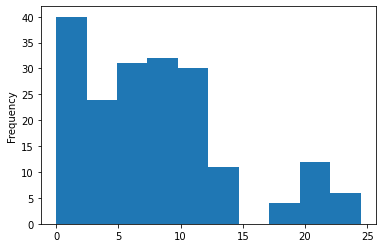

In [28]:
# view percentage of missing data
p_missing = (train.isnull().sum()*100)/len(train)
p_missing.plot(kind="hist")

In [8]:
# remove any colums that have up to 50% and above missing value 110938
percentage_num = (len(train)*15) / 100 # get 70% value of the total lenght
missing_cols = [cols for cols in train.columns if train[cols].isnull().sum() >= percentage_num]
missing_cols

['home_team_coach_id',
 'away_team_coach_id',
 'home_team_history_coach_1',
 'home_team_history_coach_2',
 'home_team_history_coach_3',
 'home_team_history_coach_4',
 'home_team_history_coach_5',
 'home_team_history_coach_6',
 'home_team_history_coach_7',
 'home_team_history_coach_8',
 'home_team_history_coach_9',
 'home_team_history_coach_10',
 'away_team_history_coach_1',
 'away_team_history_coach_2',
 'away_team_history_coach_3',
 'away_team_history_coach_4',
 'away_team_history_coach_5',
 'away_team_history_coach_6',
 'away_team_history_coach_7',
 'away_team_history_coach_8',
 'away_team_history_coach_9',
 'away_team_history_coach_10']

In [ ]:
-understand the data and the features
-see relationship and corelation between featueres and target
-remove feature or sets of features highly corelated with the target

Home and away team have about 15% of missing data. Let see their relationship against our target

In [47]:
cat_cols = [cols for cols in train.columns if train[cols].dtypes == object]
print (cat_cols)

['target', 'home_team_name', 'away_team_name', 'match_date', 'league_name', 'is_cup', 'home_team_history_match_date_1', 'home_team_history_match_date_2', 'home_team_history_match_date_3', 'home_team_history_match_date_4', 'home_team_history_match_date_5', 'home_team_history_match_date_6', 'home_team_history_match_date_7', 'home_team_history_match_date_8', 'home_team_history_match_date_9', 'home_team_history_match_date_10', 'away_team_history_match_date_1', 'away_team_history_match_date_2', 'away_team_history_match_date_3', 'away_team_history_match_date_4', 'away_team_history_match_date_5', 'away_team_history_match_date_6', 'away_team_history_match_date_7', 'away_team_history_match_date_8', 'away_team_history_match_date_9', 'away_team_history_match_date_10']


In [4]:
#mapping tts
tts = tts['target'].map({'home':0, 'draw':1, 'away':2})

In [5]:
##check history of coaches from both team and their relationship with the target
def column_and_target_corr(column):
    """
    This function takes the name of a column and plot a heatmap that 
    shows correlation between columns and the target
    """
    cols = []
    for i in train.filter(regex=column, axis=1).columns:
        cols.append(i)
    cols_score = pd.concat([train[cols], tts], axis=1)
    return cols_score.corr().style.background_gradient(cmap='coolwarm')

In [29]:
column = "home_team_history_coach"
column_and_target_corr(column)

,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,target
home_team_history_coach_1,1.000000,0.969584,0.942506,0.917068,0.891652,0.866706,0.842681,0.819620,0.794169,0.772944,0.032650
home_team_history_coach_2,0.969584,1.000000,0.968444,0.941506,0.915748,0.890291,0.865632,0.841627,0.816128,0.793599,0.032270
home_team_history_coach_3,0.942506,0.968444,1.000000,0.968061,0.941400,0.915680,0.890540,0.865936,0.839900,0.817028,0.029796
home_team_history_coach_4,0.917068,0.941506,0.968061,1.000000,0.968734,0.941674,0.915580,0.890042,0.863671,0.839668,0.028271
home_team_history_coach_5,0.891652,0.915748,0.941400,0.968734,1.000000,0.967993,0.940641,0.915209,0.889200,0.864426,0.027188
home_team_history_coach_6,0.866706,0.890291,0.915680,0.941674,0.967993,1.000000,0.967349,0.940496,0.913480,0.888081,0.027200
home_team_history_coach_7,0.842681,0.865632,0.890540,0.915580,0.940641,0.967349,1.000000,0.968384,0.940218,0.913869,0.027447
home_team_history_coach_8,0.819620,0.841627,0.865936,0.890042,0.915209,0.940496,0.968384,1.000000,0.966473,0.938892,0.025947
home_team_history_coach_9,0.794169,0.816128,0.839900,0.863671,0.889200,0.913480,0.940218,0.966473,1.000000,0.967570,0.024482
home_team_history_coach_10,0.772944,0.793599,0.817028,0.839668,0.864426,0.888081,0.913869,0.938892,0.967570,1.000000,0.022943


In [43]:
column="away_team_history_goal" #from the map, there isn't much correlation
column_and_target_corr(column)

,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,target
away_team_history_goal_1,1.000000,0.093782,0.098894,0.095785,0.092135,0.093560,0.086192,0.083995,0.084470,0.078775,0.072591
away_team_history_goal_2,0.093782,1.000000,0.092016,0.101365,0.094698,0.091260,0.088472,0.090705,0.077887,0.081214,0.065079
away_team_history_goal_3,0.098894,0.092016,1.000000,0.092185,0.097179,0.095172,0.091981,0.088157,0.084871,0.082352,0.067533
away_team_history_goal_4,0.095785,0.101365,0.092185,1.000000,0.091684,0.096812,0.092039,0.088794,0.089147,0.084641,0.066307
away_team_history_goal_5,0.092135,0.094698,0.097179,0.091684,1.000000,0.089829,0.097759,0.094406,0.093538,0.087185,0.063137
away_team_history_goal_6,0.093560,0.091260,0.095172,0.096812,0.089829,1.000000,0.089468,0.102300,0.093749,0.083154,0.060018
away_team_history_goal_7,0.086192,0.088472,0.091981,0.092039,0.097759,0.089468,1.000000,0.089569,0.097051,0.095416,0.059621
away_team_history_goal_8,0.083995,0.090705,0.088157,0.088794,0.094406,0.102300,0.089569,1.000000,0.089528,0.095984,0.064269
away_team_history_goal_9,0.084470,0.077887,0.084871,0.089147,0.093538,0.093749,0.097051,0.089528,1.000000,0.091633,0.057068
away_team_history_goal_10,0.078775,0.081214,0.082352,0.084641,0.087185,0.083154,0.095416,0.095984,0.091633,1.000000,0.059061


In [45]:
column = "away_team_history_is_play_home" #highly uncorrelated
column_and_target_corr(column)

,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,target
away_team_history_is_play_home_1,1.000000,-0.366149,0.118331,-0.056411,0.028709,-0.021464,0.012417,-0.008153,0.005728,-0.004320,0.002052
away_team_history_is_play_home_2,-0.366149,1.000000,-0.383942,0.134572,-0.067483,0.039525,-0.028505,0.012495,-0.009645,0.007186,0.010507
away_team_history_is_play_home_3,0.118331,-0.383942,1.000000,-0.396467,0.138706,-0.076409,0.040112,-0.025051,0.010898,-0.006380,-0.002897
away_team_history_is_play_home_4,-0.056411,0.134572,-0.396467,1.000000,-0.395561,0.138484,-0.069430,0.037588,-0.026665,0.011461,0.006336
away_team_history_is_play_home_5,0.028709,-0.067483,0.138706,-0.395561,1.000000,-0.403788,0.141271,-0.074126,0.041731,-0.027642,0.003968
away_team_history_is_play_home_6,-0.021464,0.039525,-0.076409,0.138484,-0.403788,1.000000,-0.406400,0.143546,-0.070366,0.035767,0.004485
away_team_history_is_play_home_7,0.012417,-0.028505,0.040112,-0.069430,0.141271,-0.406400,1.000000,-0.403431,0.138103,-0.071435,0.001502
away_team_history_is_play_home_8,-0.008153,0.012495,-0.025051,0.037588,-0.074126,0.143546,-0.403431,1.000000,-0.410252,0.146444,0.002123
away_team_history_is_play_home_9,0.005728,-0.009645,0.010898,-0.026665,0.041731,-0.070366,0.138103,-0.410252,1.000000,-0.417059,0.003731
away_team_history_is_play_home_10,-0.004320,0.007186,-0.006380,0.011461,-0.027642,0.035767,-0.071435,0.146444,-0.417059,1.000000,0.000692


In [46]:
column="home_team_history_opponent_rating"
column_and_target_corr(column)

,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,target
home_team_history_opponent_rating_1,1.000000,0.383788,0.401654,0.369174,0.365238,0.356420,0.348258,0.347235,0.328198,0.332164,0.124314
home_team_history_opponent_rating_2,0.383788,1.000000,0.380708,0.401301,0.369734,0.367113,0.351673,0.348878,0.344949,0.330851,0.116356
home_team_history_opponent_rating_3,0.401654,0.380708,1.000000,0.370984,0.398017,0.368041,0.360171,0.347539,0.336610,0.338044,0.114486
home_team_history_opponent_rating_4,0.369174,0.401301,0.370984,1.000000,0.367078,0.397289,0.359920,0.358092,0.343099,0.346384,0.106171
home_team_history_opponent_rating_5,0.365238,0.369734,0.398017,0.367078,1.000000,0.360412,0.384804,0.355529,0.350170,0.340081,0.102229
home_team_history_opponent_rating_6,0.356420,0.367113,0.368041,0.397289,0.360412,1.000000,0.359215,0.383931,0.351223,0.351913,0.100244
home_team_history_opponent_rating_7,0.348258,0.351673,0.360171,0.359920,0.384804,0.359215,1.000000,0.349435,0.379020,0.345315,0.095702
home_team_history_opponent_rating_8,0.347235,0.348878,0.347539,0.358092,0.355529,0.383931,0.349435,1.000000,0.344233,0.374191,0.093609
home_team_history_opponent_rating_9,0.328198,0.344949,0.336610,0.343099,0.350170,0.351223,0.379020,0.344233,1.000000,0.335034,0.094292
home_team_history_opponent_rating_10,0.332164,0.330851,0.338044,0.346384,0.340081,0.351913,0.345315,0.374191,0.335034,1.000000,0.087621


In [51]:
column="home_team_history_is_play_home"
column_and_target_corr(column)

,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,target
home_team_history_is_play_home_1,1.000000,-0.375026,0.115469,-0.066150,0.030638,-0.026555,0.007350,-0.007818,-0.003402,-0.000069,-0.004875
home_team_history_is_play_home_2,-0.375026,1.000000,-0.393119,0.130163,-0.071114,0.034730,-0.024815,0.012811,-0.006712,-0.005440,-0.002064
home_team_history_is_play_home_3,0.115469,-0.393119,1.000000,-0.392757,0.132104,-0.067803,0.034910,-0.030033,0.012611,-0.008349,-0.003873
home_team_history_is_play_home_4,-0.066150,0.130163,-0.392757,1.000000,-0.402465,0.138533,-0.076620,0.039127,-0.027899,0.011324,-0.000160
home_team_history_is_play_home_5,0.030638,-0.071114,0.132104,-0.402465,1.000000,-0.400710,0.137851,-0.071654,0.036009,-0.027591,-0.005197
home_team_history_is_play_home_6,-0.026555,0.034730,-0.067803,0.138533,-0.400710,1.000000,-0.403735,0.137942,-0.078115,0.043260,-0.009006
home_team_history_is_play_home_7,0.007350,-0.024815,0.034910,-0.076620,0.137851,-0.403735,1.000000,-0.413454,0.147092,-0.081434,-0.000385
home_team_history_is_play_home_8,-0.007818,0.012811,-0.030033,0.039127,-0.071654,0.137942,-0.413454,1.000000,-0.414438,0.142906,-0.009246
home_team_history_is_play_home_9,-0.003402,-0.006712,0.012611,-0.027899,0.036009,-0.078115,0.147092,-0.414438,1.000000,-0.415292,0.000676
home_team_history_is_play_home_10,-0.000069,-0.005440,-0.008349,0.011324,-0.027591,0.043260,-0.081434,0.142906,-0.415292,1.000000,0.002667


In [52]:
we can dedeuce that

dtype('float64')

In [4]:
pdp_prof = pdp.ProfileReport(train.sample(n=30000))
pdp_prof.to_file(output_file='output.html')

Summarize dataset:  13%|█▎        | 2049/15827 [09:12<37:00,  6.20it/s, scatter away_team_history_opponent_rating_8, home_team_history_goal_10] 

In [ ]:
Feature Engineering

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [ ]:
y = train['target']
data = pd.concat([train, test]).reset_index(drop=True)
data.drop(["target", "id"])
del train, test
gc.collect

data.shape

In [ ]:
-input missing data
-check outliers
-change dtypes

Xgboost, 